# Decision Trees

## Data set: https://archive.ics.uci.edu/dataset/45/heart+disease
+ The dataset comprises of 303 instances and 13 features, aiming to predict the presence of heart disease in a patient using the target variable 'num'

## Objectives (Business Understanding):
+ The aim of this classification analysis is to **develop a predictive model** that can help medical professionals **identify patients at risk of heart disease** based on key clinical and physiological features.
+ This supports the broader goal of **improving preventive healthcare** by enabling early detection of heart disease.
+ The results can guide healthcare professionals in early diagnosis and proper after planning.

## Objectives of the Decision Tree Classification:
+ Predict the **presence or absence of heart disease** using **13 clinical attributes** such as age, cholesterol level, blood pressure, maximum heart rate etc.
+ Develop and evaluate a **Decision Tree classifier**.
+ Interpret the most influential clinical features contributing to heart disease prediction.
+ Compare model results using evaluation metrics.

## Data Exploration (Data Understanding & Preparation)
#### The dataset comprises of 303 instances, 13 features and 1 target variable.

#### Features (independent variables)
+ age
+ sex
+ cp (Chest pain type)
+ trestbps (Resting blood pressure)
+ chol (Cholestrol)
+ fbs (Fasting blood sugar)
+ restecg (Resting ECG)
+ thalach (Maximum heart rate)
+ exang (Exercise induced angina)
+ oldpeak (ST depression)
+ slope
+ ca (No of major vessels)
+ thal
  
#### Target (dependent variable)
+ num

In [270]:
import pandas as pd

# Define the correct column names to the data file(from UCI documentation)
column_names = [ 
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# Read the dataset with the defined column names
df = pd.read_csv(
    'data/processed.cleveland.data',
    names=column_names,
)

# Print the type of the variable df
print("Type: ", type(df))

Type:  <class 'pandas.core.frame.DataFrame'>


In [271]:
# Print the shape of the data frame
print("\nShape: ", df.shape)

# Print information on the data frame
print("\nInfo: ")
df.info()


Shape:  (303, 14)

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


**Note:**
+ The dataset contains 303 rows and 14 columns.
+ Only ca and thal are still of type object because of missing values represented as '?'

In [272]:
# Re-read the dataset — ensure '?' missing values are handled
df = pd.read_csv(
    'data/processed.cleveland.data',
    names=column_names,
    na_values='?',
)

# Print information on the data frame after handling '?'
print("\nInfo: ")
df.info()

# Save it as a CSV file
df.to_csv("data/processed.cleveland.csv", index=False)

# Read the csv file
df = pd.read_csv('data/processed.cleveland.csv')


Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


**Note:**
+ Every column has 303 non-null values.
+ Eventhough, we know that there are a couple of data missing in the columns 'ca' and 'thal', we can see that the attributes 'ca' and 'thal' are of type float since the '?' as missing values are handled.

In [273]:
# Print the first 5 rows of the data frame
print("The first 5 rows of the dataframe: ")
df.head()

The first 5 rows of the dataframe: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [274]:
# Describe the data 
print("\nDescription of the data: ")
df.describe()


Description of the data: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


**Note:**
+ There are no major missing values, except minor gaps in 'ca' and 'thal'.
+ Most variables are continuous, except a few categorical ones (sex, cp, fbs, restecg, exang, slope, ca, thal).
+ Features like 'chol' and 'thalach' have larger numeric ranges compared to binary features like 'sex' or 'fbs'. Hence, feature scaling may be good before modeling.

In [275]:
# Interpret the correlation between the target and other variables
print("\nCorrelation: ")
df.corr()


Correlation: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.127389,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.380936,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.133554,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.014214,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.071358,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.024531,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004,0.504092


In [276]:
# Correlation between the target variable num (heart disease prediction) and other attributes 
corr_with_target = df.corr()['num'].sort_values(ascending=False)
print(corr_with_target)

num         1.000000
ca          0.518909
thal        0.509923
oldpeak     0.504092
cp          0.407075
exang       0.397057
slope       0.377957
sex         0.224469
age         0.222853
restecg     0.183696
trestbps    0.157754
chol        0.070909
fbs         0.059186
thalach    -0.415040
Name: num, dtype: float64


**Note:**
+ From the correlation matrix, the most influential variables correlated with heart disease are 'ca', 'thal', and 'oldpeak'.

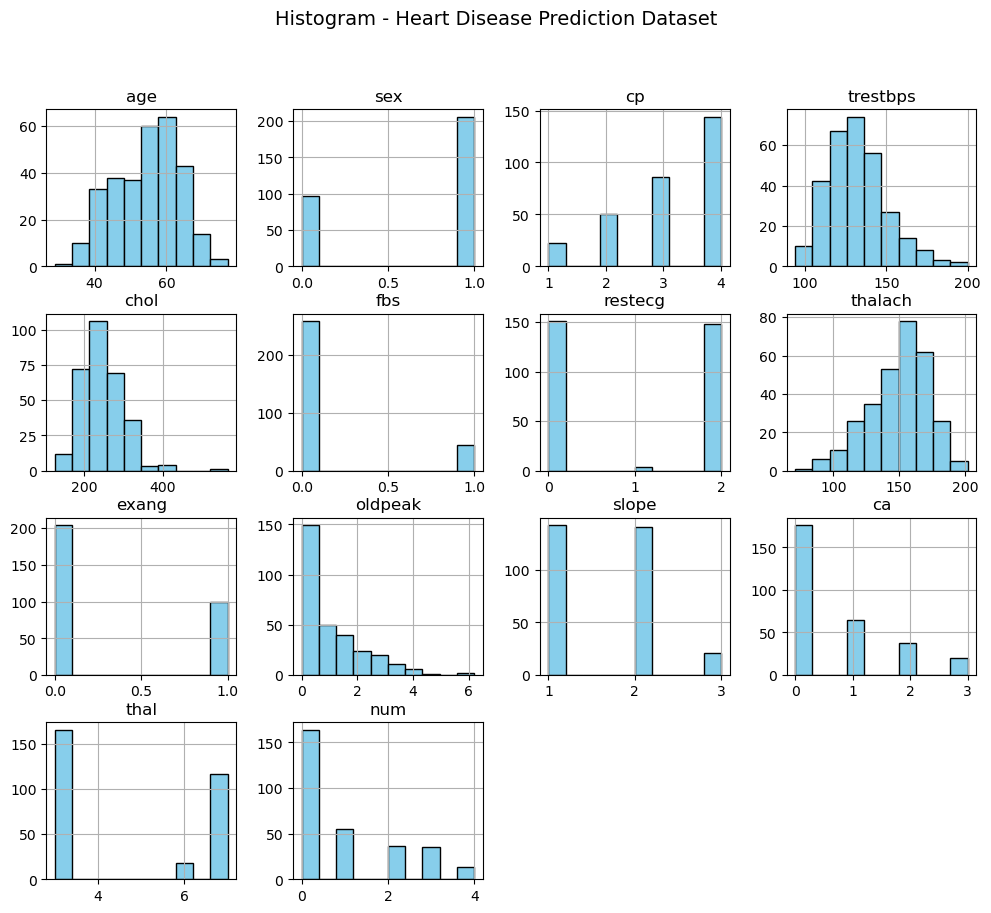

In [277]:
import matplotlib.pyplot as plt

# Draw the histogram 
df.hist(figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histogram - Heart Disease Prediction Dataset', fontsize=14)
plt.savefig('plots/HeartDiseasePredictionHistogram.png')
plt.show()

<Figure size 1400x1400 with 0 Axes>

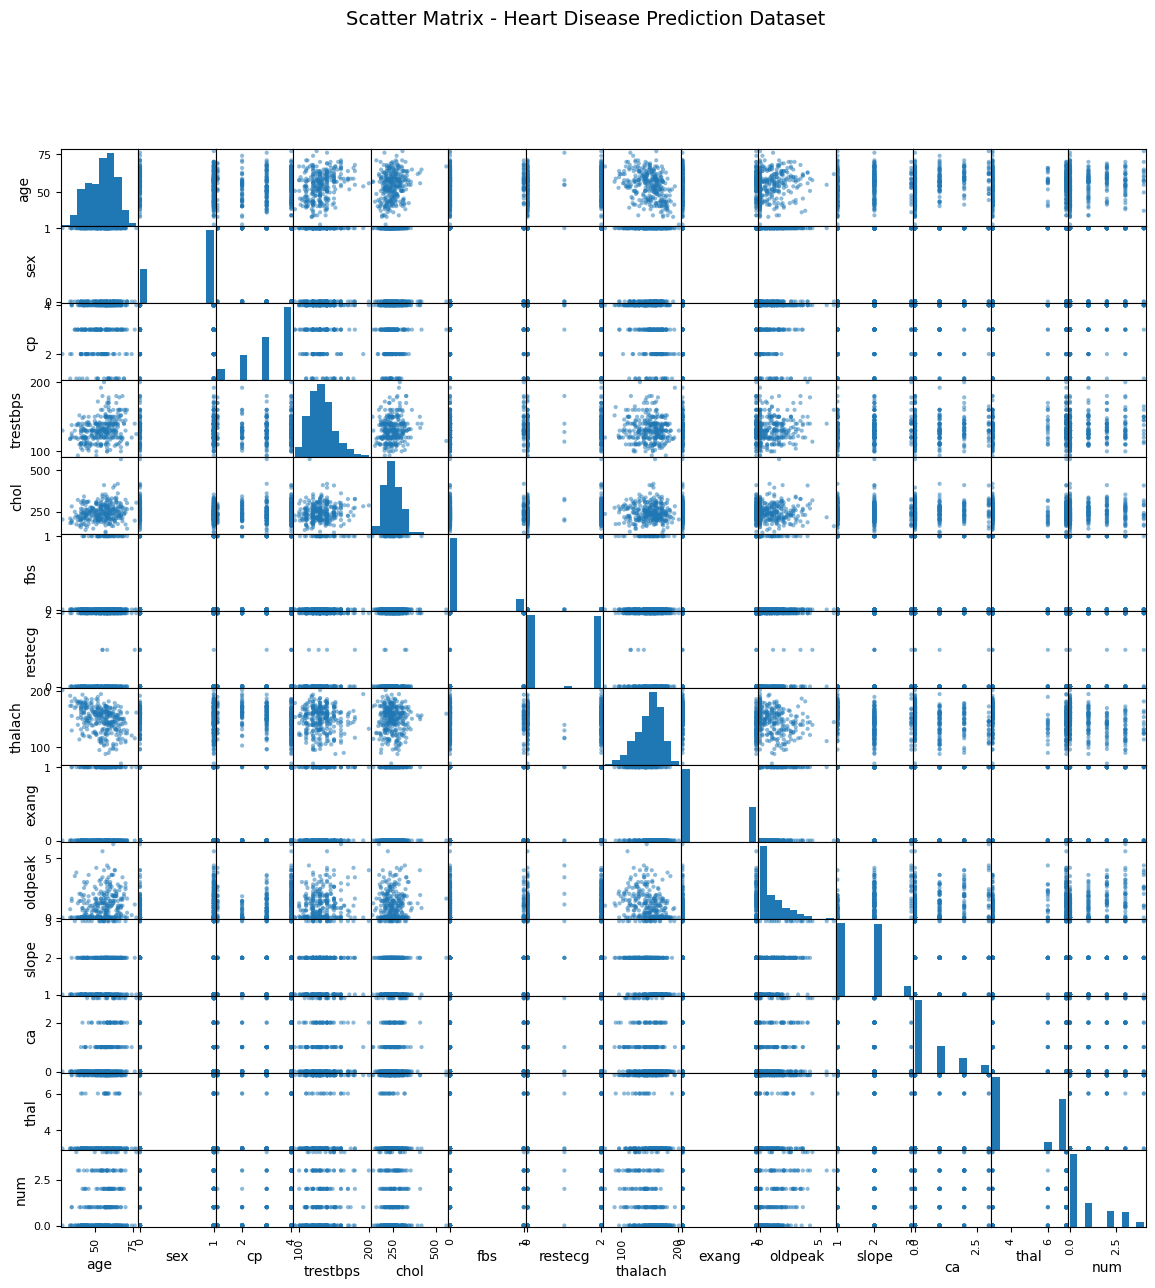

In [278]:
from pandas.plotting import scatter_matrix

# Draw scatter matrix
plt.figure(figsize=(14, 14))
scatter_matrix(df, figsize=(14, 14))

plt.suptitle('Scatter Matrix - Heart Disease Prediction Dataset', fontsize=14)
plt.savefig('plots/HeartDiseasePredictionSM.png')
plt.show()

**Note**:
+ Most features show weak linear relationships, so decision trees could perform better.

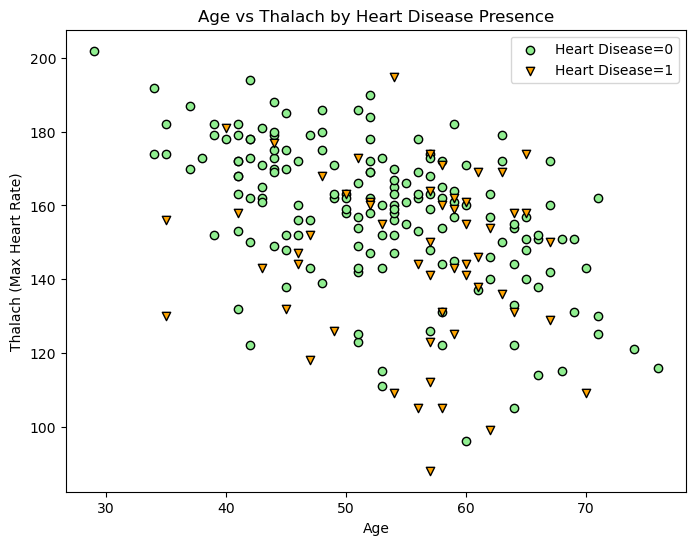

In [279]:
# Understanding the relationship of Age vs Thalach (Max Heart Rate) on prediction
plt.figure(figsize=(8,6))
for label, color, mark in [(0, 'lightgreen', 'o'), (1, 'orange', 'v')]:
    subset = df[df['num'] == label]
    plt.scatter(subset['age'], subset['thalach'], 
                color=color, marker=mark, edgecolor='black', label=f'Heart Disease={label}')
plt.title('Age vs Thalach by Heart Disease Presence')
plt.xlabel('Age')
plt.ylabel('Thalach (Max Heart Rate)')
plt.legend()
plt.savefig('plots/HeartDiseaseAgeVsThalachSP.png')
plt.show()

**Note**:
+ We can see that the thalach is low to medium range for people with heart disease

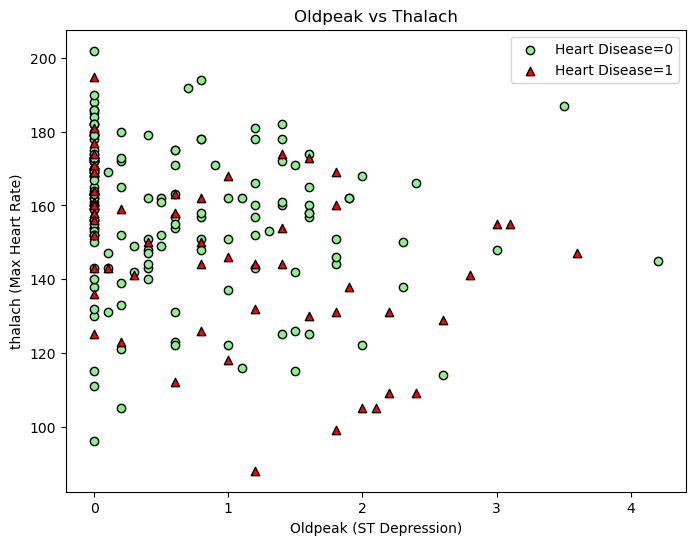

In [280]:
# Similarly for Oldpeak vs Thalach
plt.figure(figsize=(8,6))
for label, color, mark in [(0, 'lightgreen', 'o'), (1, 'red', '^')]:
    subset = df[df['num'] == label]
    plt.scatter(subset['oldpeak'], subset['thalach'], 
                color=color, marker=mark, edgecolor='black', label=f'Heart Disease={label}')
plt.title('Oldpeak vs Thalach')
plt.xlabel('Oldpeak (ST Depression)')
plt.ylabel('thalach (Max Heart Rate)')
plt.legend()
plt.savefig('plots/HeartDiseaseOldpeakVsThalachSP.png')
plt.show()

**Note**:
+ We can see that high oldpeak usually have a lower thalach often contributing to heart disease

In [281]:
# Determine the input and target variables - X (input) y (target)
X = df.drop('num', axis='columns')
y = df.num

# Convert the target variable values into binary
y = y.apply(lambda x: 1 if x > 0 else 0)

# Convert the categorical variables using one hot encoding:
X = pd.get_dummies(X, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])
print(list(X.columns))

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_0.0', 'sex_1.0', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_0.0', 'exang_1.0', 'slope_1.0', 'slope_2.0', 'slope_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0']


In [282]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [283]:
# Print the shape of X and y after data preparation.
print("Final shape of X:", X.shape)
print("Final shape of y:", y.shape)

Final shape of X: (303, 25)
Final shape of y: (303,)


## Modeling - Decision Trees

In [284]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Perform cross-validation to find the best tree depth
for d in range(1, 25):
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print(f"Depth: {d}, Accuracy: {scores.mean()}")

Depth: 1, Accuracy: 0.6946666666666668
Depth: 2, Accuracy: 0.7238333333333333
Depth: 3, Accuracy: 0.7441666666666666
Depth: 4, Accuracy: 0.7068333333333333
Depth: 5, Accuracy: 0.7523333333333333
Depth: 6, Accuracy: 0.7235
Depth: 7, Accuracy: 0.7151666666666667
Depth: 8, Accuracy: 0.7108333333333332
Depth: 9, Accuracy: 0.7070000000000001
Depth: 10, Accuracy: 0.7231666666666665
Depth: 11, Accuracy: 0.7314999999999999
Depth: 12, Accuracy: 0.7356666666666667
Depth: 13, Accuracy: 0.7231666666666666
Depth: 14, Accuracy: 0.7234999999999999
Depth: 15, Accuracy: 0.7356666666666667
Depth: 16, Accuracy: 0.7316666666666667
Depth: 17, Accuracy: 0.7153333333333334
Depth: 18, Accuracy: 0.7195
Depth: 19, Accuracy: 0.7235
Depth: 20, Accuracy: 0.7275
Depth: 21, Accuracy: 0.7273333333333334
Depth: 22, Accuracy: 0.7316666666666667
Depth: 23, Accuracy: 0.7356666666666667
Depth: 24, Accuracy: 0.7398333333333333


In [285]:
# Train model with the best-performing depth
best_depth = 5
model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

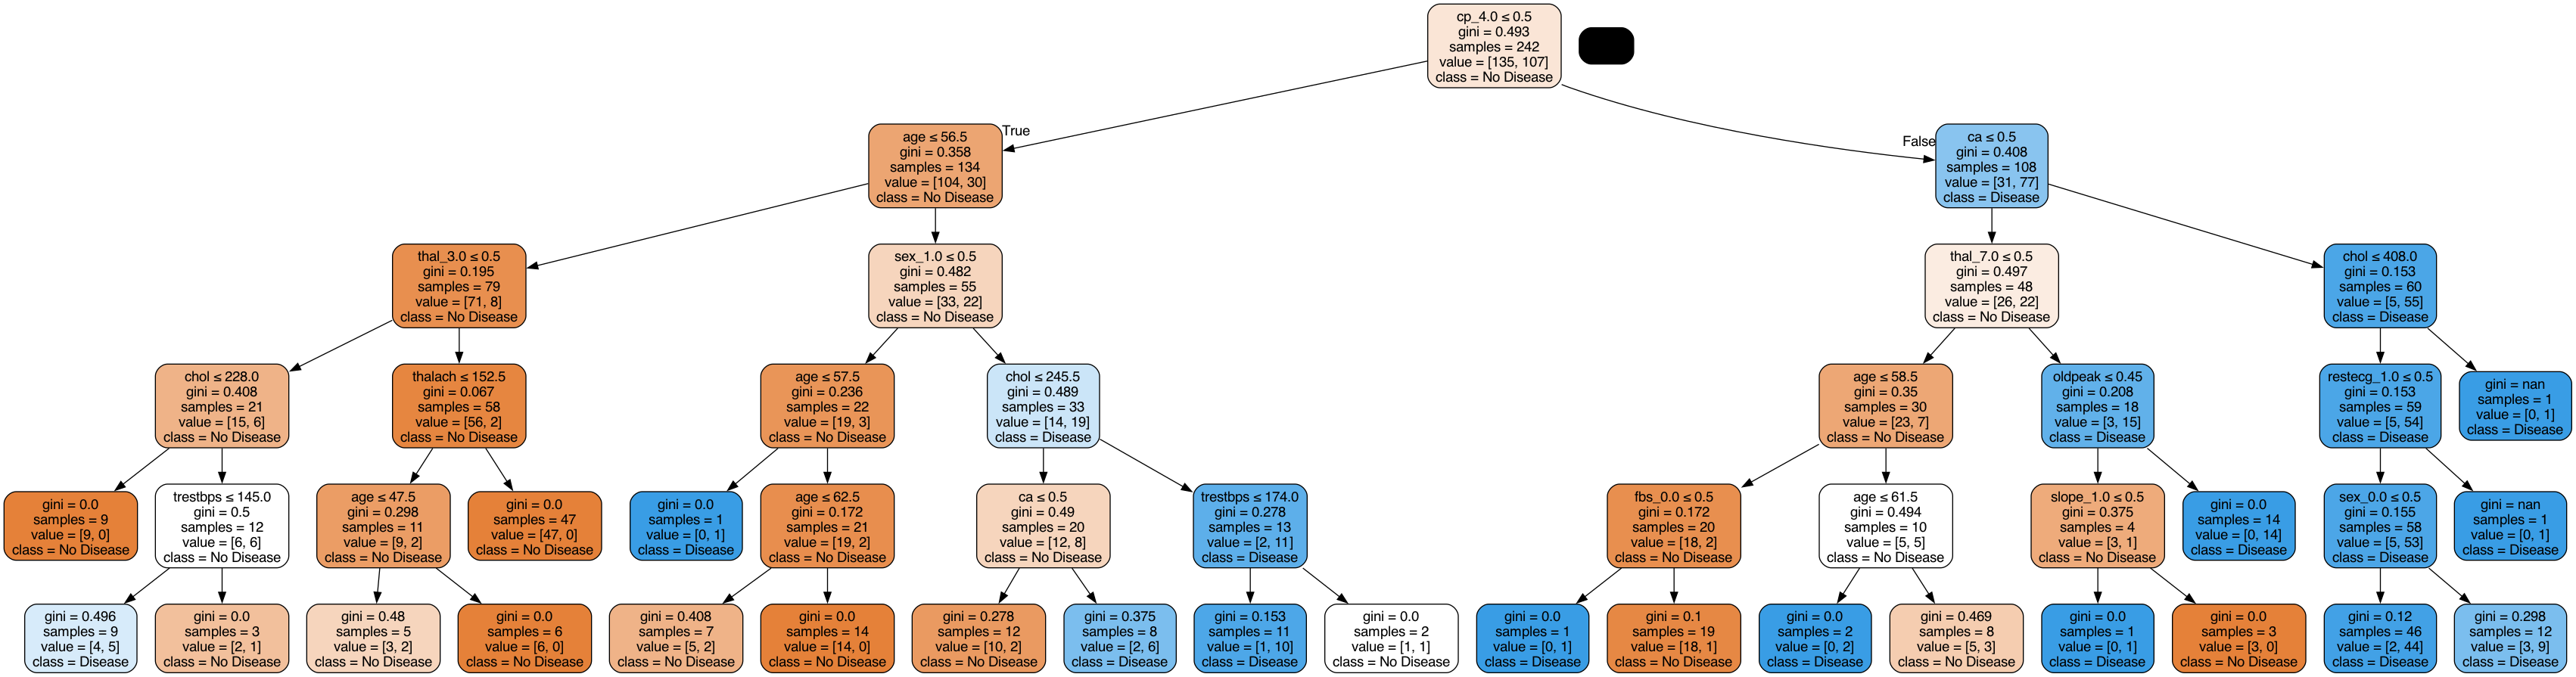

In [286]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# View the decision tree
feature_names = X.columns
class_names = ['No Disease', 'Disease']

dot_data = StringIO()

export_graphviz(
    model,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=feature_names,
    class_names=class_names,
    max_depth=None,
)

# Create graph from dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save as PNG
graph.write_png('plots/heart_disease_tree.png')

# Display inside Jupyter Notebook
Image(graph.create_png())

**Note:**
+ The top feature (thal) is the most important decision variable, the model splits there first and there are splits on cp, ca, oldpeak as well.

# Evaluation

In [287]:
# Print the accuracies on the training and testing data
print("Optimal Depth:",best_depth)
print("Training Accuracy:",model.score(X_train, y_train))
print("Test Accuracy:",model.score(X_test, y_test))

Optimal Depth: 5
Training Accuracy: 0.9008264462809917
Test Accuracy: 0.8360655737704918


In [289]:
from sklearn.metrics import accuracy_score

# Get predictions
y_hat = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_hat))

Test Accuracy: 0.8360655737704918


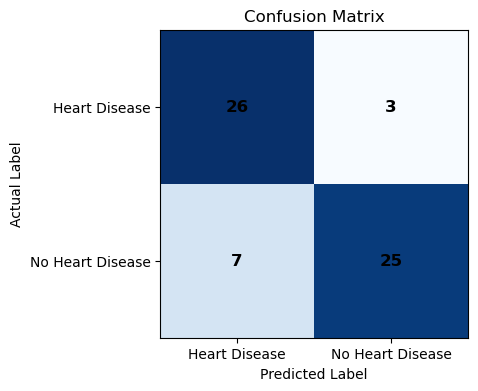

In [293]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_hat = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_hat)
labels = ['Heart Disease', 'No Heart Disease']

# Confusion Matrix Plot
fig, ax = plt.subplots(figsize=(4, 4))
im = ax.imshow(cm, cmap='Blues')

# Axis labels
ax.set(
    xticks=np.arange(len(labels)),
    yticks=np.arange(len(labels)),
    xticklabels=labels, yticklabels=labels,
    xlabel='Predicted Label', ylabel='Actual Label',
    title='Confusion Matrix'
)

# Add counts
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f"{cm[i, j]}", ha="center", va="center",
                color="black", fontsize=12, fontweight='bold')
plt.savefig('plots/ConfusionMatrixHeartDisease.png')
plt.show()

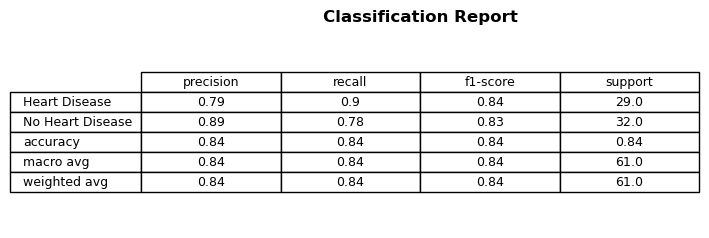

In [251]:
# Classification Report
report = classification_report(y_test, y_hat, target_names=labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot as a table
fig, ax = plt.subplots(figsize=(6, 2.5))
ax.axis('off')
tbl = ax.table(
    cellText=np.round(df_report.values, 2),
    rowLabels=df_report.index,
    colLabels=df_report.columns,
    loc='center',
    cellLoc='center'
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(9)
tbl.scale(1.2, 1.2)

plt.title("Classification Report", fontsize=12, fontweight='bold', pad=10)
plt.show()

##### **Note**:
+ The Decision Tree at depth 5 generalizes well.
+ The test accuracy is 83.6%, showing good predictive ability on unseen data.
+ The confusion matrix shows most predictions are correct, though there are:
8 false positives (No disease predicted as disease)
9 false negatives (disease missed as no disease).

# Conclusion

#### The Decision Tree model (depth = 3) achieved 83.6% test accuracy and 90% training accuracy.Key predictors include thal, ca, oldpeak, and cp. The model shows good generalization with minimal overfitting but misses a few disease cases (false negatives).